In [1]:
import pandas as pd
import matplotlib.pylab as plt
from datetime import datetime
import seaborn as sns
import numpy as np

# Data reading

In [2]:
# !pip3 install numpy==1.19

In [3]:
np.__version__

'1.19.5'

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/fuwiak/jsystem_my_repo/main/Dane/1990.csv")

In [5]:
df.head()

,Time stamp,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh)
0,01/01/1990 00:00,0,0,0,12.3844,11.6,0.0
1,01/01/1990 01:00,0,0,0,12.0406,11.5,0.0
2,01/01/1990 02:00,0,0,0,12.3313,12.0,0.0
3,01/01/1990 03:00,0,0,0,12.4312,12.1,0.0
4,01/01/1990 04:00,0,0,0,12.8359,12.5,0.0


# Data processing

In [6]:
#get full date, day, month, year, hour from timestamp
df['full_date'] = df[df.columns[0]].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%S').strftime('%m/%d/%Y'))
df['day'] = df[df.columns[0]].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%S').day)
df['month'] = df[df.columns[0]].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%S').month)
df['year'] = df[df.columns[0]].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%S').year)
df['hour'] = df[df.columns[0]].apply(lambda x: datetime.strptime(x,'%d/%m/%Y %H:%S').hour)


In [7]:
df.columns

Index(['Time stamp', 'GHI (W/m2)', 'DNI (W/m2)', ' DHI (W/m2)',
       'Wet bulb temp (C)', 'Dew point temp (C)', 'Energy (kWh)', 'full_date',
       'day', 'month', 'year', 'hour'],
      dtype='object')

In [8]:
df.set_index('full_date', inplace=True)
df

,Time stamp,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh),day,month,year,hour
full_date,,,,,,,,,,,
01/01/1990,01/01/1990 00:00,0,0,0,12.3844,11.6,0.00,1,1,1990,0
01/01/1990,01/01/1990 01:00,0,0,0,12.0406,11.5,0.00,1,1,1990,1
01/01/1990,01/01/1990 02:00,0,0,0,12.3313,12.0,0.00,1,1,1990,2
01/01/1990,01/01/1990 03:00,0,0,0,12.4312,12.1,0.00,1,1,1990,3
01/01/1990,01/01/1990 04:00,0,0,0,12.8359,12.5,0.00,1,1,1990,4
...,...,...,...,...,...,...,...,...,...,...,...
12/31/1990,31/12/1990 19:00,0,0,0,15.1031,14.0,-0.24,31,12,1990,19
12/31/1990,31/12/1990 20:00,0,0,0,14.2469,12.9,0.00,31,12,1990,20
12/31/1990,31/12/1990 21:00,0,0,0,13.9937,13.1,0.00,31,12,1990,21


In [9]:
energy = df['Energy (kWh)']

In [10]:
energy

full_date
01/01/1990    0.00
01/01/1990    0.00
01/01/1990    0.00
01/01/1990    0.00
01/01/1990    0.00
              ... 
12/31/1990   -0.24
12/31/1990    0.00
12/31/1990    0.00
12/31/1990    0.00
12/31/1990    0.00
Name: Energy (kWh), Length: 8760, dtype: float64

In [11]:
df.dtypes

Time stamp             object
GHI (W/m2)              int64
DNI (W/m2)              int64
 DHI (W/m2)             int64
Wet bulb temp (C)     float64
Dew point temp (C)    float64
Energy (kWh)          float64
day                     int64
month                   int64
year                    int64
hour                    int64
dtype: object

# Data statistics

In [12]:
df.describe()

,GHI (W/m2),DNI (W/m2),DHI (W/m2),Wet bulb temp (C),Dew point temp (C),Energy (kWh),day,month,year,hour
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.0,8760.000000
mean,187.417352,184.102740,77.507306,12.134381,10.565148,149.144354,15.720548,6.526027,1990.0,11.500000
std,268.384810,288.374696,111.491970,3.495635,3.484829,265.067137,8.796749,3.448048,0.0,6.922582
min,0.000000,0.000000,0.000000,2.131250,1.100000,-0.240000,1.000000,1.000000,1990.0,0.000000
25%,0.000000,0.000000,0.000000,9.687500,8.000000,0.000000,8.000000,4.000000,1990.0,5.750000
50%,0.000000,0.000000,0.000000,11.989100,10.400000,0.000000,16.000000,7.000000,1990.0,11.500000
75%,327.000000,290.000000,124.000000,14.496900,12.900000,179.063750,23.000000,10.000000,1990.0,17.250000
max,1128.000000,1044.000000,552.000000,24.856300,22.400000,1003.220000,31.000000,12.000000,1990.0,23.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc281bc0810>,
      dtype=object)

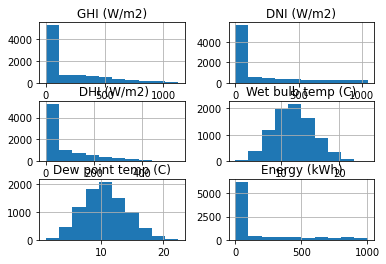

In [13]:
data_names = ['GHI (W/m2)', 'DNI (W/m2)', ' DHI (W/m2)',
       'Wet bulb temp (C)', 'Dew point temp (C)', 'Energy (kWh)']

df[data_names].hist()

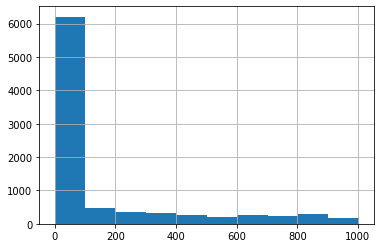

In [14]:
energy.hist()
plt.show()

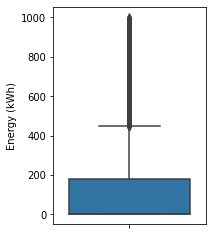

In [15]:
plt.subplot(1,2,2)
sns.boxplot(y=energy, data=df)

# times series

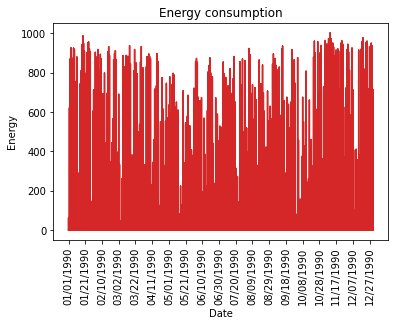

In [16]:
# Draw Plot
def plot_df(df, x, y, title="Energy consumption", xlabel='Date', ylabel='Energy'):
    fig, ax = plt.subplots(1,1)
    ax.plot(x, y, color='tab:red')
    ax.title.set_text(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_xticks(ax.get_xticks()[::20])
    ax.tick_params(axis='x', labelrotation=90)
    plt.show()
   
  
  
    

plot_df(df, x=df.index, y=energy, title='Energy consumption')

In [53]:
short_window = 400
long_window = short_window*2

([<matplotlib.axis.XTick at 0x7fc280aec710>,
 <a list of 5 Text major ticklabel objects>)

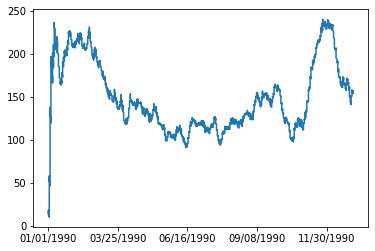

In [18]:
#moving average plot
new_df = df.rolling(window=long_window, min_periods=10, center=False).mean()
plt.plot(new_df['Energy (kWh)'])
plt.xticks(new_df.index[::2000])

# Rolling statistics 

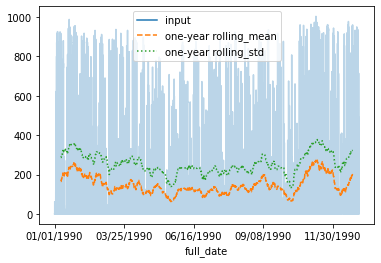

In [19]:

rolling = energy.rolling(365, center=True)
data = pd.DataFrame({'input': energy,
                     'one-year rolling_mean': rolling.mean(),
                     'one-year rolling_std': rolling.std()})
ax = data.plot(style=['-', '--', ':'])
ax.lines[0].set_alpha(0.3)




Text(0.5, 0.98, 'Additive Decompose')

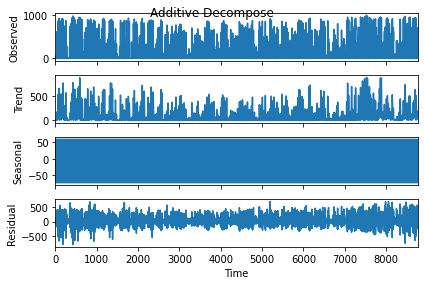

In [54]:
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
# Additive Decomposition
# result_add = seasonal_decompose(df['Energy (kWh)'].values, model='additive', extrapolate_trend='freq')
decomposition = seasonal_decompose(df['Energy (kWh)'].values, freq=12, model='additive')
decomposition.plot().suptitle('Additive Decompose')


In [23]:
# trend = decomposition.trend
# seasonal = decomposition.seasonal


# Feature selection

## filter methods
1) Using Pearson Correlation

2) Chi2

### Using Pearson Correlation

In [24]:
data_names = ['GHI (W/m2)', 'DNI (W/m2)', ' DHI (W/m2)',
       'Wet bulb temp (C)', 'Dew point temp (C)', 'Energy (kWh)']

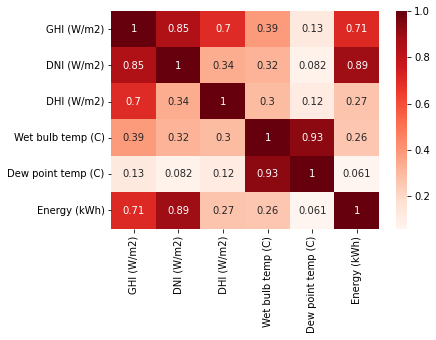

In [25]:
cor = df[data_names].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
#Correlation with output variable
cor_target = abs(cor['Energy (kWh)'])
#Selecting highly correlated features
relevant_features = cor_target[(cor_target>0.5) & (cor_target<1)]
relevant_features

GHI (W/m2)    0.709867
DNI (W/m2)    0.890319
Name: Energy (kWh), dtype: float64

In [27]:
X_pearson = df[relevant_features.index]
X_pearson

,GHI (W/m2),DNI (W/m2)
full_date,,
01/01/1990,0,0
01/01/1990,0,0
01/01/1990,0,0
01/01/1990,0,0
01/01/1990,0,0
...,...,...
12/31/1990,0,0
12/31/1990,0,0
12/31/1990,0,0


In [28]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


data_names = ['GHI (W/m2)', 'DNI (W/m2)', ' DHI (W/m2)',
       'Wet bulb temp (C)', 'Dew point temp (C)']
X = df[data_names]


le.fit(df['Energy (kWh)'])

y = le.transform(df['Energy (kWh)'])
X_norm = MinMaxScaler().fit_transform(X)


N_best_features = 3
chi_selector = SelectKBest(chi2, k=N_best_features)

chi_selector.fit(X_norm, y)

SelectKBest(k=3, score_func=<function chi2 at 0x7fc2741bfa70>)

In [29]:
chi_support = chi_selector.get_support()
chi_feature = df[data_names].loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')


3 selected features


In [30]:
chi_feature

['GHI (W/m2)', 'DNI (W/m2)', ' DHI (W/m2)']

In [55]:
X_chi2 = df[chi_feature]


# Classical ML

In [32]:
X = df[df.columns[1:-1]]
y = energy

In [33]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=100)

In [34]:
from sklearn.tree import DecisionTreeRegressor

In [35]:
from sklearn.tree import DecisionTreeRegressor
clf = DecisionTreeRegressor()


In [36]:
clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)

In [37]:

import numpy as np
from sklearn import metrics
# calculate MAE, MSE, RMSE
clf = clf.fit(train_X, train_y)
predictions = clf.predict(test_X)

print("MAE", metrics.mean_absolute_error(test_y, predictions))
print("MSE", metrics.mean_squared_error(test_y, predictions))
print("RMSE", np.sqrt(metrics.mean_squared_error(test_y, predictions)))

MAE 0.20010019322678865
MSE 0.26416381907714714
RMSE 0.5139686946470059


In [ ]:
#nie stanowi to tresci szkolenia, zostawiam dla porownania z ML

# LSTM

In [38]:
dataset = df['Energy (kWh)'].values #numpy.ndarray
dataset = dataset.astype('float32')
dataset = np.reshape(dataset, (-1, 1))
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
train_size = int(len(dataset) * 0.80)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)
    
look_back = 30
X_train, Y_train = create_dataset(train, look_back)
X_test, Y_test = create_dataset(test, look_back)

# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [39]:
X_train.shape

(6977, 1, 30)

In [40]:
Y_train.shape

(6977,)

In [41]:
import math
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from keras.callbacks import EarlyStopping

In [42]:
X_train.shape

(6977, 1, 30)

In [43]:
Y_train.shape

(6977,)

In [44]:
np.__version__

'1.19.5'

In [45]:
#LSTM

model = Sequential()
model.add(LSTM(100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, Y_train, epochs=20, batch_size=70, validation_data=(X_test, Y_test), 
                    callbacks=[EarlyStopping(monitor='val_loss', patience=10)], verbose=1, shuffle=False)

model.summary()

Epoch 1/20
100/100 [==============================] - 3s 8ms/step - loss: 0.0387 - val_loss: 0.0503
Epoch 2/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0215 - val_loss: 0.0391
Epoch 3/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0179 - val_loss: 0.0346
Epoch 4/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0168 - val_loss: 0.0330
Epoch 5/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.0324
Epoch 6/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0320
Epoch 7/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0155 - val_loss: 0.0316
Epoch 8/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0153 - val_loss: 0.0311
Epoch 9/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0150 - val_loss: 0.0307
Epoch 10/20
100/100 [==============================] - 0s 4ms/step - loss: 0.0149 - val_loss: 0.0312

In [46]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)
# invert predictions
train_predict = scaler.inverse_transform(train_predict)
Y_train = scaler.inverse_transform([Y_train])
test_predict = scaler.inverse_transform(test_predict)
Y_test = scaler.inverse_transform([Y_test])
print('Train Mean Absolute Error:', mean_absolute_error(Y_train[0], train_predict[:,0]))
print('Train Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_train[0], train_predict[:,0])))
print('Test Mean Absolute Error:', mean_absolute_error(Y_test[0], test_predict[:,0]))
print('Test Root Mean Squared Error:',np.sqrt(mean_squared_error(Y_test[0], test_predict[:,0])))

Train Mean Absolute Error: 62.26881196049271
Train Root Mean Squared Error: 116.65364985388717
Test Mean Absolute Error: 102.19101163478322
Test Root Mean Squared Error: 174.61484868562277


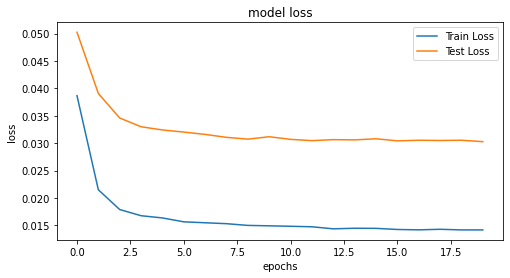

In [47]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();

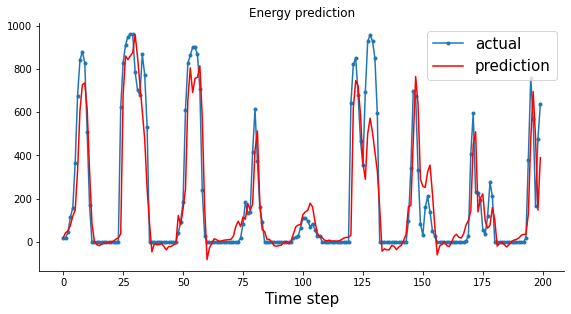

In [48]:
aa=[x for x in range(200)]
plt.figure(figsize=(8,4))
plt.plot(aa, Y_test[0][:200], marker='.', label="actual")
plt.plot(aa, test_predict[:,0][:200], 'r', label="prediction")
# plt.tick_params(left=False, labelleft=True) #remove ticks
plt.tight_layout()
sns.despine(top=True)
plt.subplots_adjust(left=0.07)
plt.title("Energy prediction")
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show();